# Finland Population Analysis

## Runtime Setup

In [37]:
# data processing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Artifacts and Constants

In [38]:
population_real_estate_finland_file_path = "../data/preprocessed/population_real_estate_fi.csv"
regions_mapping_file_path = "../data/regions_stat_fi.csv"
map_finland_file_path = "../data/map_finland/maakunta1000k_2025Polygon.shp"

In [58]:
population_columns = ['Average age, both sexes', 'Average age, men',
       'Average age, women', 'Citizens of foreign countries',
       'Demographic dependency ratio', 'Economic dependency ratio',
       'Finnish speakers', 'Foreign-language speakers', 'Land area, km²',
       'Persons born abroad', 'Persons with foreign background',
       'Population 31 Dec', 'Sami speakers',
       'Share of persons aged 15 to 64, %',
       'Share of persons aged 65 or over, %',
       'Share of persons aged under 15, %', 'Swedish speakers']

In [61]:
real_estate_columns = ['Region', 'Annual change, %',
       'Annual change, % (real price index)', 'Average area m2', 'Index',
       'Lower quartile', 'Medianprice', 'Number',
       'Price per square meter (EUR/m2)', 'Real price index',
       'Upper quartile']

## Data Loading

In [40]:
population_real_estate_finland = pd.read_csv(population_real_estate_finland_file_path)
population_real_estate_finland.head()

,Year,Province,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,...,"Annual change, %","Annual change, % (real price index)",Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),Real price index,Upper quartile
0,2015,Eastern Finland,45.030691,43.614491,46.397441,11391.0,74.051163,193.097674,546426.0,16148.0,...,NaN,NaN,4189.0,95.6,1.5,4.7,74.0,10.0,95.5,13.7
1,2015,Northern Finland,41.411696,40.261485,42.598357,12539.0,71.769492,185.086441,647500.0,15790.0,...,NaN,NaN,3766.0,90.4,1.7,7.4,128.0,7.7,90.3,22.5
2,2015,Southern Finland,40.918147,39.496620,42.217560,133971.0,64.540000,146.645000,1580028.0,198794.0,...,NaN,NaN,2669.0,99.1,8.6,35.0,318.0,32.3,99.0,75.8
3,2015,Western Finland,42.959321,41.516291,44.357175,70521.0,71.039634,158.221341,2082114.0,97236.0,...,NaN,NaN,2565.0,101.3,4.3,13.6,206.0,13.7,101.2,33.6
4,2016,Eastern Finland,45.244514,43.845629,46.604816,12096.0,75.934884,191.344186,542865.0,17351.0,...,-17.4,-18.0,3927.0,78.9,1.9,5.0,74.0,7.0,78.3,15.0


<Axes: >

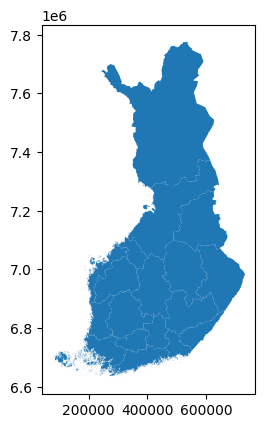

In [41]:
map_finland = gpd.read_file(map_finland_file_path)
map_finland.plot()

## Modelling

### Relation Population Changes and Real Estate Prices

In [42]:
population_changes = population_real_estate_finland.sort_values(["Province", "Year"])

def compute_rel_changes(g):
    numeric_cols = g.select_dtypes("number").columns.difference(["Year"])
    g = g.copy()
    for col in numeric_cols:
        prev = g[col].shift()
        g[col] = np.where(prev.abs() < 1e-9, 0, (g[col] - prev) / prev.abs())
    return g

population_changes = (
    population_changes
    .groupby("Province", group_keys=False)
    .apply(compute_rel_changes)
    .reset_index(drop=True)
)

population_changes = population_changes[ # delete empty values for first year
    ~population_changes["Year"].eq(population_changes.groupby("Province")["Year"].transform("min"))
]

population_changes

/tmp/ipykernel_475253/2147464347.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_rel_changes)


,Year,Province,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,...,"Annual change, %","Annual change, % (real price index)",Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),Real price index,Upper quartile
1,2016,Eastern Finland,0.004748,0.005300,0.004470,0.061891,0.025438,-0.009081,-0.006517,0.074498,...,NaN,NaN,-0.062545,-0.174686,0.266667,0.063830,0.000000,-0.300000,-0.180105,0.094891
2,2017,Eastern Finland,0.006097,0.006814,0.005900,-0.007771,0.035465,-0.017842,-0.008181,0.024552,...,1.000000,0.966667,-0.083015,0.000000,-0.105263,-0.280000,-0.135135,-0.042857,-0.006386,0.333333
3,2018,Eastern Finland,0.007175,0.007331,0.005689,0.004499,0.035285,-0.017176,-0.008828,0.021263,...,0.000000,33.500000,0.301027,0.204056,0.294118,0.638889,0.125000,-0.194030,0.195373,-0.210000
4,2019,Eastern Finland,0.006607,0.007517,0.007012,0.006885,0.030969,0.004797,-0.009600,0.025448,...,-1.289216,-1.364103,-0.021131,-0.058947,-0.136364,-0.237288,-0.208333,-0.259259,-0.072043,-0.234177
5,2020,Eastern Finland,0.006209,0.007263,0.005324,0.020924,0.026769,0.029861,-0.007356,0.031584,...,3.949153,3.422535,-0.085259,0.174497,0.210526,0.333333,0.842105,0.725000,0.172654,0.900826
6,2021,Eastern Finland,0.004768,0.004464,0.004037,0.065682,0.028338,-0.039046,-0.004494,0.060870,...,-2.379310,-2.546512,0.207151,-0.240000,0.000000,-0.200000,-0.228571,-0.043478,-0.265810,-0.439130
7,2022,Eastern Finland,0.003597,0.004226,0.003794,0.111305,0.028633,-0.010915,-0.008621,0.089182,...,2.241667,1.721805,-0.264613,0.296992,-0.347826,0.125000,-0.382716,0.484848,0.192463,0.302326
8,2023,Eastern Finland,0.003510,0.003580,0.003188,0.282960,0.020003,0.020457,-0.009235,0.204542,...,-2.778523,-3.854167,0.211600,-0.530435,-0.333333,-0.259259,-0.260000,-0.500000,-0.548533,-0.404762
9,2024,Eastern Finland,0.003752,0.003834,0.003643,0.221402,0.021187,NaN,-0.009161,0.170670,...,1.543396,1.503650,-0.052305,0.288066,0.200000,0.275000,0.189189,0.408163,0.277500,1.500000
11,2016,Northern Finland,0.006048,0.006161,0.005395,0.072095,0.029378,-0.013983,-0.002366,0.090880,...,NaN,NaN,-0.041954,0.195796,1.176471,0.000000,-0.101562,0.233766,0.187154,-0.155556


In [43]:
real_estate_changes = population_real_estate_finland.sort_values(["Region", "Year"]).copy()
real_estate_changes["Index_next_year"] = real_estate_changes.groupby("Region")["Index"].shift(-1)
real_estate_changes["Annual_change_next_year"] = real_estate_changes.groupby("Region")["Annual change, %"].shift(-1)

In [62]:
population_real_estate_changes = population_changes.drop(columns=real_estate_columns).merge(
    real_estate_changes.drop(columns=population_columns),
    left_on=["Province", "Year"],
    right_on=["Region", "Year"],
    how="inner"
)

In [63]:
population_real_estate_changes.head()

,Year,Province_x,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,...,Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),Real price index,Upper quartile,Index_next_year,Annual_change_next_year
0,2016,Eastern Finland,0.004748,0.005300,0.004470,0.061891,0.025438,-0.009081,-0.006517,0.074498,...,3927.0,78.9,1.9,5.0,74.0,7.0,78.3,15.0,78.9,0.0
1,2017,Eastern Finland,0.006097,0.006814,0.005900,-0.007771,0.035465,-0.017842,-0.008181,0.024552,...,3601.0,78.9,1.7,3.6,64.0,6.7,77.8,20.0,95.0,20.4
2,2018,Eastern Finland,0.007175,0.007331,0.005689,0.004499,0.035285,-0.017176,-0.008828,0.021263,...,4685.0,95.0,2.2,5.9,72.0,5.4,93.0,15.8,89.4,-5.9
3,2019,Eastern Finland,0.006607,0.007517,0.007012,0.006885,0.030969,0.004797,-0.009600,0.025448,...,4586.0,89.4,1.9,4.5,57.0,4.0,86.3,12.1,105.0,17.4
4,2020,Eastern Finland,0.006209,0.007263,0.005324,0.020924,0.026769,0.029861,-0.007356,0.031584,...,4195.0,105.0,2.3,6.0,105.0,6.9,101.2,23.0,79.8,-24.0


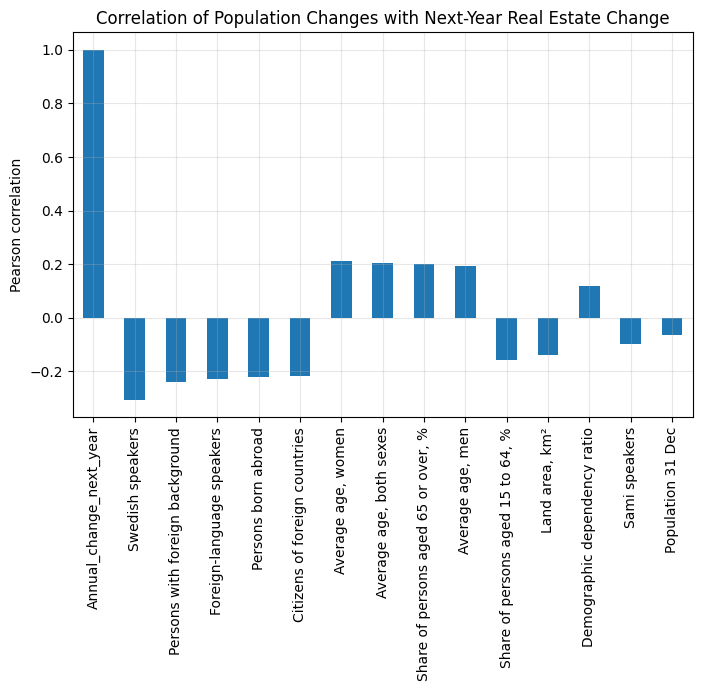

In [65]:
corrs = population_real_estate_changes[population_columns + ["Annual_change_next_year"]].corr()["Annual_change_next_year"].sort_values(ascending=False)

corrs.head(15)
top_features = corrs.abs().sort_values(ascending=False).head(15).index

fig, ax = plt.subplots(figsize=(8, 5))
corrs[top_features].plot(kind="bar", ax=ax)
plt.title("Correlation of Population Changes with Next-Year Real Estate Change")
plt.ylabel("Pearson correlation")
plt.grid(True, alpha=0.3)
plt.show()